In [1]:
%load_ext autoreload
%autoreload 2

In [499]:
import torch
from sbi.neural_nets.estimators.categorical_net import CategoricalMADE, CategoricalMassEstimator
from sbi.utils.torchutils import BoxUniform
import matplotlib.pyplot as plt
from sbi.inference import MNLE
from sbi.neural_nets.estimators import MixedDensityEstimator
from sbi.neural_nets.estimators.nflows_flow import NFlowsFlow
from sbi.neural_nets.net_builders.mdn import build_mdn

In [487]:
def toy_simulator(theta):
    x_centers = torch.tensor([[-0.5, 0.5]])
    y_centers = torch.tensor([[-1, 0, 1]])

    x_c = x_centers[:,torch.argmin(torch.abs(x_centers.T - theta[:,0]), dim=0)]
    y_c = y_centers[:,torch.argmin(torch.abs(y_centers.T - theta[:,1]), dim=0)]

    std2 = 0.3
    m = torch.cat([x_c, y_c])
    x_cont = m + std2*torch.randn(m.shape)    

    # Calculate integer indices after x_cont is computed
    x_c = torch.argmin(torch.abs(x_centers.T - x_c), dim=0)
    y_c = torch.argmin(torch.abs(y_centers.T - y_c), dim=0)

    return torch.vstack([x_cont, x_c, y_c]).T

In [488]:
prior = BoxUniform(low=torch.tensor([-2.0]*2), high=torch.tensor([2.0]*2))
theta = prior.sample((10000,))
x = toy_simulator(theta)

# define a unique color for every combination of x1 and x2
unique_classes = torch.unique(x[:,2:], dim=0)
colors = torch.linspace(0, 1, len(unique_classes))
color = torch.zeros(x.shape[0])
for i, c in enumerate(unique_classes):
    color[(x[:,2:] == c).all(dim=1)] = colors[i]

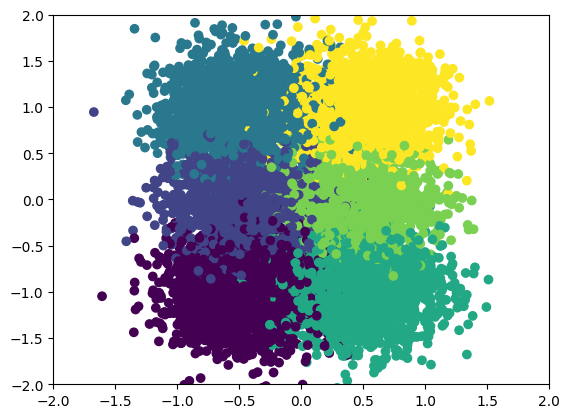

In [489]:
plt.scatter(x[:,0], x[:,1], c=color)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

In [500]:
CategoricalMassEstimator(CategoricalMADE([2,3], 50, 2), (2,),(2,))
# build_mdn(x[:,:2], theta)

NFlowsFlow(
  (net): Flow(
    (_transform): CompositeTransform(
      (_transforms): ModuleList(
        (0): PointwiseAffineTransform()
        (1): IdentityTransform()
      )
    )
    (_distribution): MultivariateGaussianMDN(
      (_hidden_net): Sequential(
        (0): Linear(in_features=2, out_features=50, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.0, inplace=False)
        (3): Linear(in_features=50, out_features=50, bias=True)
        (4): ReLU()
        (5): Linear(in_features=50, out_features=50, bias=True)
        (6): ReLU()
      )
      (_logits_layer): Linear(in_features=50, out_features=10, bias=True)
      (_means_layer): Linear(in_features=50, out_features=20, bias=True)
      (_unconstrained_diagonal_layer): Linear(in_features=50, out_features=20, bias=True)
      (_upper_layer): Linear(in_features=50, out_features=10, bias=True)
    )
    (_embedding_net): Sequential(
      (0): Standardize()
      (1): Identity()
    )
  )
)

In [ ]:
mnle_posterior = trainer.build_posterior(prior=prior)
